## The problem: 
* Want an increase in revenue
* Tested whether raising the price would increase revenue (a price change from 39 dollars to 59 dollars)

Load my modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets
import os
import sys
import warnings
import numpy as np
from matplotlib import pyplot
warnings.filterwarnings('ignore')

Read in the test data

In [2]:
test_results = pd.read_csv('test_results.csv')

test_results.head(5)

,user_id,timestamp,source,device,operative_system,test,price,converted
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39,0
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39,0
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39,0
3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59,0
4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39,0


Let's get some information about the table

In [3]:
test_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 8 columns):
user_id             316800 non-null int64
timestamp           316800 non-null object
source              316800 non-null object
device              316800 non-null object
operative_system    316800 non-null object
test                316800 non-null int64
price               316800 non-null int64
converted           316800 non-null int64
dtypes: int64(4), object(4)
memory usage: 19.3+ MB


I have 316800 user events. All variables seem to be loaded properly. Now I want to do a sanity check of the unique values per column

In [4]:
test_results.nunique()

user_id             316800
timestamp           140931
source                  12
device                   2
operative_system         6
test                     2
price                    2
converted                2
dtype: int64

All checks out. user_id has 316800 rows.  

In [5]:
test_results[test_results['user_id'].duplicated()]

,user_id,timestamp,source,device,operative_system,test,price,converted


Nothing duplicated! Let's check for any missing data!

In [6]:
test_results.isnull().sum()

user_id             0
timestamp           0
source              0
device              0
operative_system    0
test                0
price               0
converted           0
dtype: int64

No null values! Let's load the other dataset and have a look.

In [7]:
user_pd = pd.read_csv('user_table.csv')

user_pd.head(5)

,user_id,city,country,lat,long
0,510335,Peabody,USA,42.53,-70.97
1,89568,Reno,USA,39.54,-119.82
2,434134,Rialto,USA,34.11,-117.39
3,289769,Carson City,USA,39.15,-119.74
4,939586,Chicago,USA,41.84,-87.68


Let's check out the dataframe like the previous one

In [8]:
user_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275616 entries, 0 to 275615
Data columns (total 5 columns):
user_id    275616 non-null int64
city       275616 non-null object
country    275616 non-null object
lat        275616 non-null float64
long       275616 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 10.5+ MB


Note to self, there are not as many user ids as in the test table, so I will have missing data for users in the test set. Let's check the unique values per column

In [9]:
user_pd.nunique()

user_id    275616
city          923
country         1
lat           713
long          830
dtype: int64

Looks like the company only has data from the US. Let's check for duplicated rows.

In [10]:
user_pd[user_pd['user_id'].duplicated()]

,user_id,city,country,lat,long


None! And null values?

In [11]:
user_pd.isnull().sum()

user_id    0
city       0
country    0
lat        0
long       0
dtype: int64

None too! Let's join these two tables together and work from the full dataset. I want to do a left join on the test table because those have more users.

In [12]:
df_combined = pd.merge(test_results, user_pd, on ='user_id', how='left')

df_combined.tail(5)

,user_id,timestamp,source,device,operative_system,test,price,converted,city,country,lat,long
316795,17427,2015-04-11 09:29:15,ads_facebook,web,windows,0,39,0,NaN,NaN,NaN,NaN
316796,687787,2015-03-16 23:31:55,direct_traffic,web,windows,0,39,0,Bell Gardens,USA,33.97,-118.15
316797,618863,2015-04-11 01:35:19,ads-google,web,mac,0,39,0,West Seneca,USA,42.84,-78.75
316798,154636,2015-05-14 05:46:42,friend_referral,mobile,android,0,39,0,Walnut Creek,USA,37.90,-122.04
316799,832372,2015-03-08 17:12:33,ads_facebook,mobile,android,1,59,0,Chicago,USA,41.84,-87.68


Did a sanity check to make sure we did the correct join (some user_ids have no country information). Let's double check the number of user IDs

In [13]:
df_combined.nunique()

user_id             316800
timestamp           140931
source                  12
device                   2
operative_system         6
test                     2
price                    2
converted                2
city                   923
country                  1
lat                    713
long                   830
dtype: int64

And we have the correct number of userids!

Let's make some plots to explore the data with respect to the two treatments

I want to just get a sense of how many people buy this product with respect to treatment 

converted         0         1
price                        
39         0.980111  0.019889
59         0.984430  0.015570


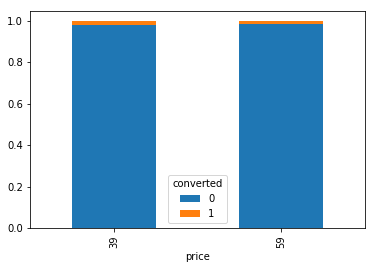

In [14]:
table = pd.crosstab(df_combined.price, df_combined.converted)

table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
print(table.div(table.sum(1).astype(float), axis=0))

It looks like a larger percentage (by 0.4%) buy the product at the lower price, so when you increase the price, you lose in conversion. Let's look at this with respect to whether or not they do convert

price            39        59
converted                    
0          0.638733  0.361267
1          0.694043  0.305957


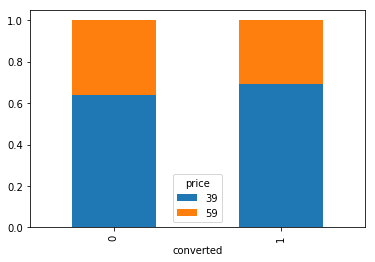

In [15]:
table = pd.crosstab(df_combined.converted, df_combined.price)

table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
print(table.div(table.sum(1).astype(float), axis=0))

It looks like of those who convert, a larger proportion of them come from the lower price (~6% difference) compared to not-converting. Let's look at some other categories

In [16]:
mysubset = df_combined.groupby(['price', 'converted', 'device']).agg({'device': np.size})
# Change: groupby state_office and divide by sum
mypcts = mysubset.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))

mypcts

device
price converted device           
39    0         mobile  58.255704
                web     39.755368
      1         mobile   1.180726
                web      0.808202
59    0         mobile  56.903652
                web     41.539324
      1         mobile   0.934915
                web      0.622109

It looks like most users who ultimately purchase this product come through a mobile device. What about their type of operating system?

In [17]:
mysubset = df_combined.groupby(['price', 'converted', 'operative_system']).agg({'operative_system': np.size})
# Change: groupby state_office and divide by sum
mypcts = mysubset.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))

mypcts

operative_system
price converted operative_system                  
39    0         android                  23.398397
                iOS                      29.793953
                linux                     1.071682
                mac                       7.863938
                other                     5.103813
                windows                  30.779289
      1         android                   0.388312
                iOS                       0.719882
                linux                     0.016776
                mac                       0.205258
                other                     0.072531
                windows                   0.586169
59    0         android                  23.126665
                iOS                      28.871092
                linux                     1.690207
                mac                       7.487207
                other                     4.950582
                windows                  32.317223
      1         android                   0.290901
                iOS                       0.588813
                mac                       0.162975
                other                     0.055201
                windows                   0.459134

It looks like the number of people who use a mobile app come through an apple product, while those who come through a website come through a windows computer

In [18]:
mysubset = df_combined.groupby(['price', 'converted', 'source']).agg({'source': np.size})
# Change: groupby state_office and divide by sum
mypcts = mysubset.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))
mypcts

source
price converted source                    
39    0         ads-bing          7.108037
                ads-google       18.260539
                ads-yahoo         2.337274
                ads_facebook     16.422594
                ads_other         9.364885
                direct_traffic   18.861510
                friend_referral   6.205593
                seo-bing          0.637977
                seo-google        7.320696
                seo-other         2.852885
                seo-yahoo         2.107346
                seo_facebook      6.531736
      1         ads-bing          0.096215
                ads-google        0.421370
                ads-yahoo         0.039966
                ads_facebook      0.397687
                ads_other         0.147036
                direct_traffic    0.258052
                friend_referral   0.269894
                seo-bing          0.019736
                seo-google        0.130260
                seo-other         0.050821
                seo-yahoo         0.041940
                seo_facebook      0.115951
59    0         ads-bing          7.178782
                ads-google       18.482756
                ads-yahoo         2.395556
                ads_facebook     16.630450
                ads_other         9.171281
                direct_traffic   18.739485
                friend_referral   6.411222
                seo-bing          0.708853
                seo-google        6.960606
                seo-other         2.920405
                seo-yahoo         2.160732
                seo_facebook      6.682847
      1         ads-bing          0.069221
                ads-google        0.369760
                ads-yahoo         0.027162
                ads_facebook      0.285644
                ads_other         0.114783
                direct_traffic    0.192766
                friend_referral   0.222557
                seo-bing          0.009638
                seo-google        0.113907
                seo-other         0.036801
                seo-yahoo         0.022781
                seo_facebook      0.092002

It looks like facebook and google, whether through a search or an add, is the primary driver of getting people to know about the app. Categories that are the highest in non conversion are also the highest in conversion. Direct traffic to the site seems important, but the mechanism for how people find the link in the first place is unclear. In general, ads are effective and work better than people searching about this product (perhaps because ads expose users who don't know about this in a more targeted way).

Let's take a look at geography -- I want to plot the lat longs to see where people are tuning into this product'

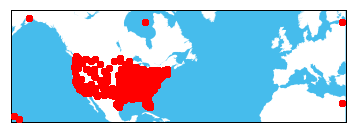

In [19]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

lat = df_combined['lat'].values
lon = df_combined['long'].values

# determine range to print based on min, max lat and lon of the data
margin = 2 # buffer to add to the range
lat_min = min(lat) - margin
lat_max = max(lat) + margin
lon_min = min(lon) - margin
lon_max = max(lon) + margin

# create map using BASEMAP
m = Basemap(llcrnrlon=lon_min,
            llcrnrlat=lat_min,
            urcrnrlon=lon_max,
            urcrnrlat=lat_max,
            lat_0=(lat_max - lat_min)/2,
            lon_0=(lon_max-lon_min)/2,
            projection='merc',
            resolution = 'h',
            area_thresh=10000.,
            )
# m.drawcoastlines()
# m.drawcountries()
# m.drawstates()
m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color = 'white',lake_color='#46bcec')
# convert lat and lon to map projection coordinates
lons, lats = m(lon, lat)
# plot points as red dots
m.scatter(lons, lats, marker = 'o', color='r', zorder=5)
plt.show()

Looks like there are some outliers in the data, but the users are scattered across the US (although the resolution is low). Company mighht want to check out why there is data like this. I would check it but I'm running out of time. I want to do a t-test to see if there is a difference between the two treatments in terms of the conversion rate

In [20]:
df_combined.groupby(['price', 'converted']).count()

user_id  timestamp  source  device  operative_system    test  \
price converted                                                                 
39    0           198641     198641  198641  198641            198641  198641   
      1             4031       4031    4031    4031              4031    4031   
59    0           112351     112351  112351  112351            112351  112351   
      1             1777       1777    1777    1777              1777    1777   

                   city  country     lat    long  
price converted                                   
39    0          172892   172892  172892  172892  
      1            3484     3484    3484    3484  
59    0           97705    97705   97705   97705  
      1            1535     1535    1535    1535

I am performing a Z test, testing the difference between two sample proportions

In [21]:
from statsmodels.stats.proportion import proportions_ztest

count = np.array([4031, 1777])
nobs = np.array([202672, 114128])
proportions_ztest(count,nobs,value=None, alternative='two-sided')
# stat, pval =proportions_ztest(count, nobs, value)

# print('%.80f' % pval)

(8.6993160977767747, 3.3389027146749256e-18)

I found a significant difference between the two treatments, suggesting that increasing the price LOWERS the number of people buying the product


In [22]:
## Perform some back of the envelop calculations
print(0.019889 * 200000 * 39)
print(0.015570 * 200000 * 59)

155134.2
183726.0


While you get a significantly smaller amount of people buying the product, the total revenue for the people that DO buy increases your overall bottom line

In [23]:
import statsmodels.stats.api as sms

In [24]:
es = sms.proportion_effectsize(0.019889, 0.015570)

In [25]:
sms.NormalIndPower().solve_power(es, power=0.8, alpha=0.05, ratio=1)

14601.480593981747

We oversampled. We only needed 14601 samples per treatment in order to detect the effect we detected. 

In [26]:
df_combined['month'] = df_combined.timestamp.str[5:7]
df_combined['day'] = df_combined.timestamp.str[8:10]
df_combined['year'] = df_combined.timestamp.str[0:4]

In [27]:
df_combined.head(5)

,user_id,timestamp,source,device,operative_system,test,price,converted,city,country,lat,long,month,day,year
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39,0,Buffalo,USA,42.89,-78.86,05,08,2015
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39,0,Lakeville,USA,44.68,-93.24,05,10,2015
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39,0,Parma,USA,41.38,-81.73,04,04,2015
3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59,0,Fayetteville,USA,35.07,-78.90,05,07,2015
4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39,0,Fishers,USA,39.95,-86.02,05,24,2015


In [28]:
df_combined = df_combined.sort_values(['year', 'month','day'])

In [29]:
df_combined.head(5)

,user_id,timestamp,source,device,operative_system,test,price,converted,city,country,lat,long,month,day,year
213,922037,2015-03-02 15:25:27,friend_referral,web,windows,0,39,0,Arvada,USA,39.82,-105.11,03,02,2015
303,762299,2015-03-02 09:51:19,ads_facebook,mobile,iOS,0,39,0,Idaho Falls,USA,43.49,-112.03,03,02,2015
762,109620,2015-03-02 14:34:50,ads-google,web,linux,1,59,0,Phoenix,USA,33.54,-112.07,03,02,2015
1484,241249,2015-03-02 10:02:11,seo_facebook,mobile,android,0,39,0,New Orleans,USA,30.07,-89.93,03,02,2015
1643,698108,2015-03-02 21:33:33,seo-google,mobile,android,1,59,0,Indianapolis,USA,39.78,-86.15,03,02,2015


In [30]:
df_combined['treatmentcount'] = (df_combined['price'] == 59).cumsum()
df_combined['controlcount'] = (df_combined['price'] == 39).cumsum()

In [31]:
df_combined.head(5)

,user_id,timestamp,source,device,operative_system,test,price,converted,city,country,lat,long,month,day,year,treatmentcount,controlcount
213,922037,2015-03-02 15:25:27,friend_referral,web,windows,0,39,0,Arvada,USA,39.82,-105.11,03,02,2015,0,1
303,762299,2015-03-02 09:51:19,ads_facebook,mobile,iOS,0,39,0,Idaho Falls,USA,43.49,-112.03,03,02,2015,0,2
762,109620,2015-03-02 14:34:50,ads-google,web,linux,1,59,0,Phoenix,USA,33.54,-112.07,03,02,2015,1,2
1484,241249,2015-03-02 10:02:11,seo_facebook,mobile,android,0,39,0,New Orleans,USA,30.07,-89.93,03,02,2015,1,3
1643,698108,2015-03-02 21:33:33,seo-google,mobile,android,1,59,0,Indianapolis,USA,39.78,-86.15,03,02,2015,2,3


my starting date was march 2nd, 2015

In [32]:
df_combined[df_combined['treatmentcount'] > 14601].head(5)

,user_id,timestamp,source,device,operative_system,test,price,converted,city,country,lat,long,month,day,year,treatmentcount,controlcount
96760,976678,2015-03-14 14:37:56,friend_referral,mobile,iOS,1,59,0,Anchorage,USA,61.18,-149.19,03,14,2015,14602,26268
96768,37274,2015-03-14 16:32:12,ads_facebook,web,windows,0,39,0,Yonkers,USA,40.95,-73.87,03,14,2015,14602,26269
96774,918062,2015-03-14 06:37:07,seo-google,web,mac,1,59,0,NaN,NaN,NaN,NaN,03,14,2015,14603,26269
96807,577739,2015-03-14 05:43:23,ads_facebook,web,windows,0,39,0,Bridgeport,USA,41.19,-73.20,03,14,2015,14603,26270
96905,271503,2015-03-14 20:07:60,ads-bing,web,windows,0,39,0,Euclid,USA,41.59,-81.52,03,14,2015,14603,26271


could have stopped in 12 days

# RECOMMENDATIONS

* Increase the price. Your revenues will go up
* Perform targeted ads on facebook and google to increase conversions

## If I had more time

* Plot bar graphs instead of charts
* plot top 10 cites for no conversions and conversions

In [33]:
mysubset = df_combined.groupby(['price', 'converted', 'source']).agg({'source': np.size})
# Change: groupby state_office and divide by sum
mypcts = mysubset.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

In [136]:
mysubset = df_combined.groupby(['converted', 'device']).agg({'source': np.size}).apply(lambda x:100 * x / float(x.sum()))
mysubset.unstack()

source           
device        mobile        web
converted                      
0          57.768624  40.398043
1           1.092172   0.741162

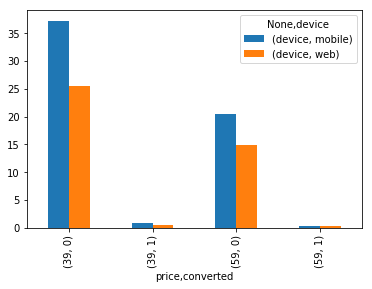

In [37]:
mysubset = df_combined.groupby(['price', 'converted', 'device']).agg({'device': np.size}).apply(lambda x:100 * x / float(x.sum())).unstack()

mysubset.plot(kind = 'bar')

# # mysubset2 = mysubset['device'].aggregate(np.size).unstack()
# # # Change: groupby state_office and divide by sum
# # # mypcts = mysubset.groupby(level=1).apply(lambda x: 100 * x / float(x.sum()))
# # mysubset2.plot(kind = 'bar')
# mysubset = df_combined.groupby(['price', 'converted', 'device']).agg({'device': np.size})
# # Change: groupby state_office and divide by sum
# mypcts = mysubset.groupby(level=0).apply(lambda x:
#                                                  100 * x / float(x.sum()))

# mypcts

Text(0,0.5,'% users')

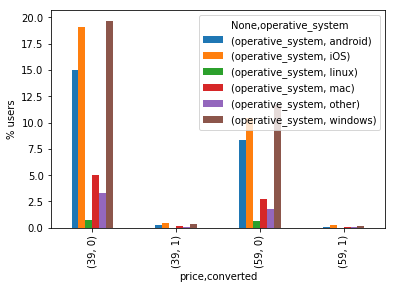

In [38]:
mysubset = df_combined.groupby(['price', 'converted', 'operative_system']).agg({'operative_system': np.size}).apply(lambda x:100 * x / float(x.sum())).unstack()

mysubset.plot(kind = 'bar')
plt.ylabel('% users')

In [143]:
df_combined.head(5)

,user_id,timestamp,source,device,operative_system,test,price,converted,city,country,lat,long,month,day,year,treatmentcount,controlcount
213,922037,2015-03-02 15:25:27,friend_referral,web,windows,0,39,0,Arvada,USA,39.82,-105.11,03,02,2015,0,1
303,762299,2015-03-02 09:51:19,ads_facebook,mobile,iOS,0,39,0,Idaho Falls,USA,43.49,-112.03,03,02,2015,0,2
762,109620,2015-03-02 14:34:50,ads-google,web,linux,1,59,0,Phoenix,USA,33.54,-112.07,03,02,2015,1,2
1484,241249,2015-03-02 10:02:11,seo_facebook,mobile,android,0,39,0,New Orleans,USA,30.07,-89.93,03,02,2015,1,3
1643,698108,2015-03-02 21:33:33,seo-google,mobile,android,1,59,0,Indianapolis,USA,39.78,-86.15,03,02,2015,2,3
